<a href="https://colab.research.google.com/github/AfiyatiReno/Belajar-Python-Afiyati/blob/master/Pelatihan_di_Amikom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#download fashion MNIST dataset
(X_train,Y_train), (X_test,Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
#check image shape
X_train.shape #jumlah data 60000 ukuran gambar 28x28

(60000, 28, 28)

y = 0
Label:T-shirt/top


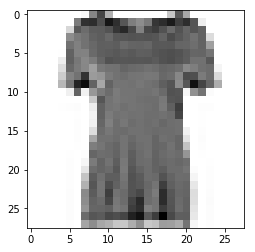

In [7]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 31,998
img_index = 10
# y_train contains the lables, ranging from 0 to 9
label_index = Y_train[img_index]
# # Show one of the images from the training dataset
plt.imshow(X_train[img_index], cmap='Greys')
# Print the label, for example 2 Pullover
print("y = " + str(label_index))
print("Label" +":"+(fashion_mnist_labels[label_index]))

In [8]:
#See the data in a matrix 28x28
import pandas as pd

val = X_train[img_index]
display(pd.DataFrame(val))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,11,142,200,106,0,0,0,0,0,0,0,85,185,112,0,0,0,0,0,0,0
1,0,0,0,0,0,0,152,214,217,194,236,216,187,149,135,153,211,217,231,205,217,188,34,0,0,0,0,0
2,0,0,0,0,0,66,185,166,180,181,190,211,221,197,146,198,206,191,168,190,172,188,175,0,0,0,0,0
3,0,0,0,0,0,135,153,160,175,180,170,186,187,190,188,190,187,174,195,185,174,161,175,59,0,0,0,0
4,0,0,0,0,0,161,147,160,170,178,177,180,168,173,174,171,185,184,185,172,171,164,174,120,0,0,0,0
5,0,0,0,0,2,175,146,145,168,178,181,185,180,184,178,179,187,191,193,190,181,171,172,158,0,0,0,0
6,0,0,0,0,35,177,155,140,151,172,191,187,186,187,186,187,182,191,194,188,180,161,161,185,0,0,0,0
7,0,0,0,0,59,170,153,141,120,154,160,161,172,168,166,161,165,172,170,164,139,149,162,166,21,0,0,0
8,0,0,0,0,79,145,160,214,123,128,153,160,164,158,157,154,155,170,165,141,195,193,152,166,61,0,0,0
9,0,0,0,0,100,157,225,245,175,113,174,158,158,160,155,160,164,178,188,135,185,240,201,172,108,0,0,0


In [0]:
# scale data to the range of [0, 1] untuk normalisasi
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [0]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(X_train, X_valid) = X_train[5000:], X_train[:5000] 
(Y_train, Y_valid) = Y_train[5000:], Y_train[:5000]

In [12]:
X_train.shape[0]

55000

In [0]:
# Reshape input data from (28, 28) to (28, 28, 1) angka 1 dibelakang itu untuk jumlah channel
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_valid = X_valid.reshape(X_valid.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [14]:
# Print training set shape
print("x_train shape:", Y_train.shape, "y_train shape:", Y_train.shape)

# Print the number of training, validation, and test datasets
print(X_train.shape[0], 'train set')
print(X_valid.shape[0], 'validation set')
print(X_test.shape[0], 'test set')

x_train shape: (55000,) y_train shape: (55000,)
55000 train set
5000 validation set
10000 test set


In [15]:

# One-hot encode the labels transformasi data label menjadi angka 1 dan 0
Y_train_one_hot = to_categorical(Y_train, 10)
Y_valid_one_hot = to_categorical(Y_valid, 10)
Y_test_one_hot = to_categorical(Y_test, 10)
Y_train_one_hot[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, 
                 kernel_size=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, 
                 kernel_size=2,
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax')) #10 indicates the number of class

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

W0831 05:00:40.363241 139693337479040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0831 05:00:40.373494 139693337479040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



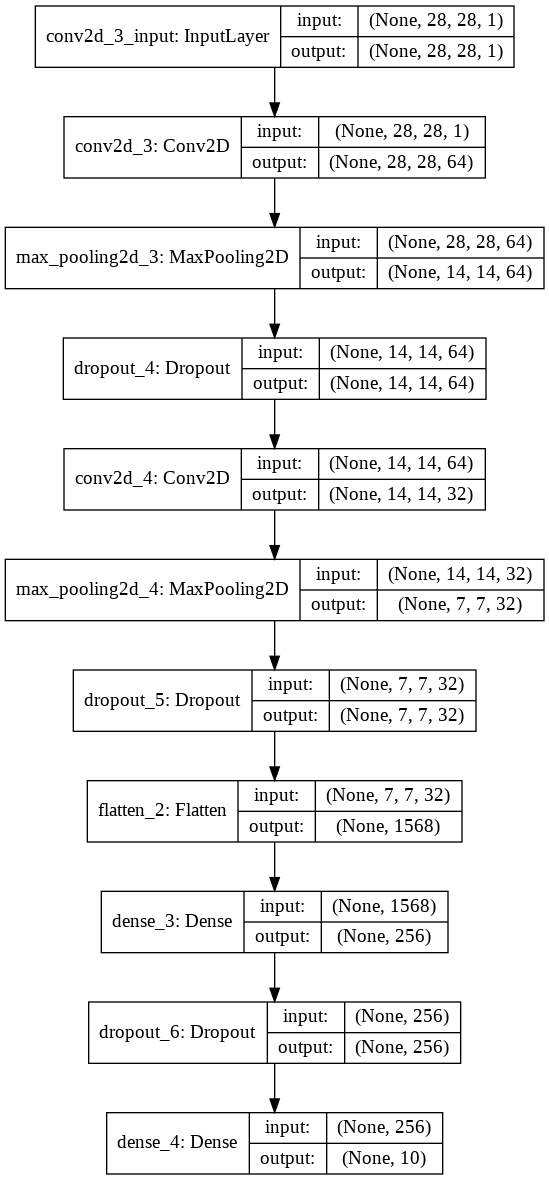

In [20]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='CNN.png')

from IPython.display import Image
Image('CNN.png')

In [21]:
#These codes aim to make sure that all dimension have the same shape 
print(X_train.shape)
print(Y_train_one_hot.shape)
print(X_valid.shape)
print(Y_valid_one_hot.shape)

(55000, 28, 28, 1)
(55000, 10)
(5000, 28, 28, 1)
(5000, 10)


In [23]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
hst = model.fit(X_train,
         Y_train_one_hot,
         batch_size=256,
         epochs=10,
         validation_data=(X_valid, Y_valid_one_hot),
         callbacks=[checkpointer])

W0831 05:02:41.496982 139693337479040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 60s 1ms/step - loss: 1.7553 - acc: 0.3518 - val_loss: 0.8899 - val_acc: 0.6740

Epoch 00001: val_loss improved from inf to 0.88990, saving model to model.weights.best.hdf5
Epoch 2/10
50176/55000 [==========================>...] - ETA: 5s - loss: 0.8842 - acc: 0.6557

KeyboardInterrupt: ignored

In [24]:
test_loss, test_acc = model.evaluate(X_test, Y_test_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 3s 345us/step
Test loss 0.7769574585437775
Test accuracy 0.7017


In [25]:
model.predict(X_test[:2])
Y_test[:2]

array([9, 2], dtype=uint8)

5


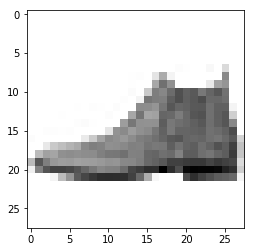

In [26]:
predictions = model.predict(X_test)
print(np.argmax(np.round(predictions[0])))
plt.imshow(X_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

NameError: ignored

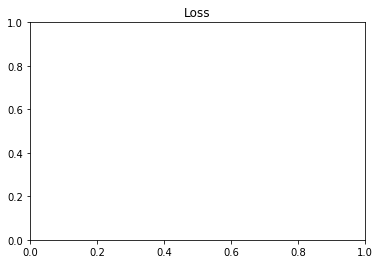

In [27]:
# visualisasi loss tiap epoch
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(hst.history['loss'], label='train')
plt.plot(hst.history['val_loss'], label='validation')
plt.legend()
plt.show()

NameError: ignored

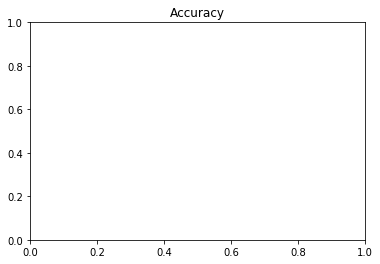

In [28]:
# visualisasi accuracy tiap epoch
plt.title('Accuracy')
plt.plot(hst.history['acc'], label='train')
plt.plot(hst.history['val_acc'], label='validation')
plt.legend()
plt.show()